## Data Preprocessing 

### Imports


In [853]:
# Data Analysis and Visualization

import pandas as pd               # Data manipulation and analysis
import numpy as np                # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Statistical data visualization
# from sklearn import datasets      # Import datasets from scikit-learn
from matplotlib.colors import LinearSegmentedColormap

# Statistical Analysis
from scipy import stats           # Statistical functions


#MBA
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

# Machine Learning
import math
from sklearn.model_selection import train_test_split   # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler      # Standardize features by removing the mean and scaling to unit variance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   # Evaluation metrics
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from mpl_toolkits.mplot3d import Axes3D



# Deep Learning
import tensorflow as tf           # Deep learning framework
from tensorflow.keras.models import Sequential        # Sequential model in Keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout  # Layers for neural networks
from tensorflow.keras.optimizers import Adam, RMSprop # Optimizers for training
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy  # Loss functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint   # Callbacks for model training

### Exploratory Data Analysis EDA

In [725]:
# Assuming it's an Excel file
df_original = pd.read_excel('kaggleSalesData.xlsx')


In [726]:
df_original.head()

,ID,ORDERID,ORDERDETAILID,DATE_,USERID,USERNAME_,NAMESURNAME,STATUS_,ITEMID,ITEMCODE,...,CATEGORY3,CATEGORY4,BRAND,USERGENDER,USERBIRTHDATE,REGION,CITY,TOWN,DISTRICT,ADDRESSTEXT
0,1,1,2,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,7438,22961,...,KITAP,KITAPLAR,KITAPLAR,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
1,2,1,4,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,12188,5482,...,HASERE OLDURUCULER,MAKINE LIKIT,DETAN,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
2,3,1,1,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,16347,30000,...,GOFRET,MUZLU,ULKER,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
3,4,1,5,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,21297,44140,...,CAMASIR YUMUSATICILAR,KLASIK,VERNEL,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
4,5,1,3,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,19984,31325,...,BAKLIYAT,FASULYELER,BIZIM,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...


In [727]:
df_original.shape

(1000000, 27)

In [728]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   ID             1000000 non-null  int64         
 1   ORDERID        1000000 non-null  int64         
 2   ORDERDETAILID  1000000 non-null  int64         
 3   DATE_          1000000 non-null  datetime64[ns]
 4   USERID         1000000 non-null  int64         
 5   USERNAME_      1000000 non-null  object        
 6   NAMESURNAME    1000000 non-null  object        
 7   STATUS_        1000000 non-null  int64         
 8   ITEMID         1000000 non-null  int64         
 9   ITEMCODE       1000000 non-null  int64         
 10  ITEMNAME       1000000 non-null  object        
 11  AMOUNT         1000000 non-null  int64         
 12  UNITPRICE      1000000 non-null  float64       
 13  PRICE          1000000 non-null  float64       
 14  TOTALPRICE     1000000 non-null  fl

In [729]:
df_original.isna().sum()

ID                  0
ORDERID             0
ORDERDETAILID       0
DATE_               0
USERID              0
USERNAME_           0
NAMESURNAME         0
STATUS_             0
ITEMID              0
ITEMCODE            0
ITEMNAME            0
AMOUNT              0
UNITPRICE           0
PRICE               0
TOTALPRICE          0
CATEGORY1           0
CATEGORY2           0
CATEGORY3           0
CATEGORY4        3047
BRAND              31
USERGENDER          0
USERBIRTHDATE       0
REGION              0
CITY                0
TOWN                0
DISTRICT            0
ADDRESSTEXT         0
dtype: int64

In [730]:
df_original.describe()

,ID,ORDERID,ORDERDETAILID,DATE_,USERID,STATUS_,ITEMID,ITEMCODE,AMOUNT,UNITPRICE,PRICE,TOTALPRICE,USERBIRTHDATE
count,1000000.000000,1000000.000000,1.000000e+06,1000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000
mean,500000.500000,99948.420176,5.000005e+05,2022-04-23 07:56:18.787200768,9998.102168,1.0,13508.715688,22190.216464,4.501097,64.513020,56.598432,254.743137,1974-12-21 16:48:43.199999968
min,1.000000,1.000000,1.000000e+00,2021-01-01 00:00:00,1.000000,1.0,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1950-01-01 00:00:00
25%,250000.750000,49984.000000,2.500008e+05,2021-08-28 00:00:00,5005.000000,1.0,6747.000000,11310.000000,3.000000,15.200000,12.730000,42.480000,1962-06-29 00:00:00
50%,500000.500000,99895.000000,5.000005e+05,2022-04-22 00:00:00,9981.000000,1.0,13514.000000,22062.000000,5.000000,35.400000,30.620000,116.000000,1974-12-13 00:00:00
75%,750000.250000,149986.000000,7.500002e+05,2022-12-19 00:00:00,15006.000000,1.0,20257.000000,32669.000000,6.000000,77.950000,67.680000,287.250000,1987-06-07 00:00:00
max,1000000.000000,199627.000000,1.000004e+06,2023-08-14 00:00:00,20000.000000,1.0,27000.000000,45157.000000,8.000000,6302.300000,7098.880000,53427.600000,1999-12-19 00:00:00
std,288675.278932,57664.175911,2.886753e+05,NaN,5767.561918,0.0,7797.099560,12562.166905,2.291865,112.526535,100.464994,529.527577,NaN


In [731]:
female_count = df_original[df_original['USERGENDER'] == "K"]['USERID'].nunique()
male_count = df_original[df_original['USERGENDER'] == "E"]['USERID'].nunique()
print('female_count :',female_count)
print('male_count   :',male_count)

female_count : 10926
male_count   : 9071


In [732]:

# Number of appearances for unique categories 
category_counts = df_original['CATEGORY1'].value_counts()
print(category_counts)


CATEGORY1
EV                 364415
KOZMETIK           119089
GIDA               115006
OYUNCAK             82502
SEKERLEME           56868
KAHVALTILIK         40510
DETERJAN            39334
BEBEK               31746
SUT                 30919
TEMIZLIK            30606
SOGUK ICECEKLER     24000
CAY-KAHVE-SEKER     11147
ET                  11136
KAGIT               11087
SICAK ICECEKLER      5780
SARF                 5379
SEBZE                4950
MEYVE                4253
KUMES                3461
SIGARALAR            3458
KARO                 1448
BALIK                1094
YESILLIK             1041
MUHTELIF              771
Name: count, dtype: int64


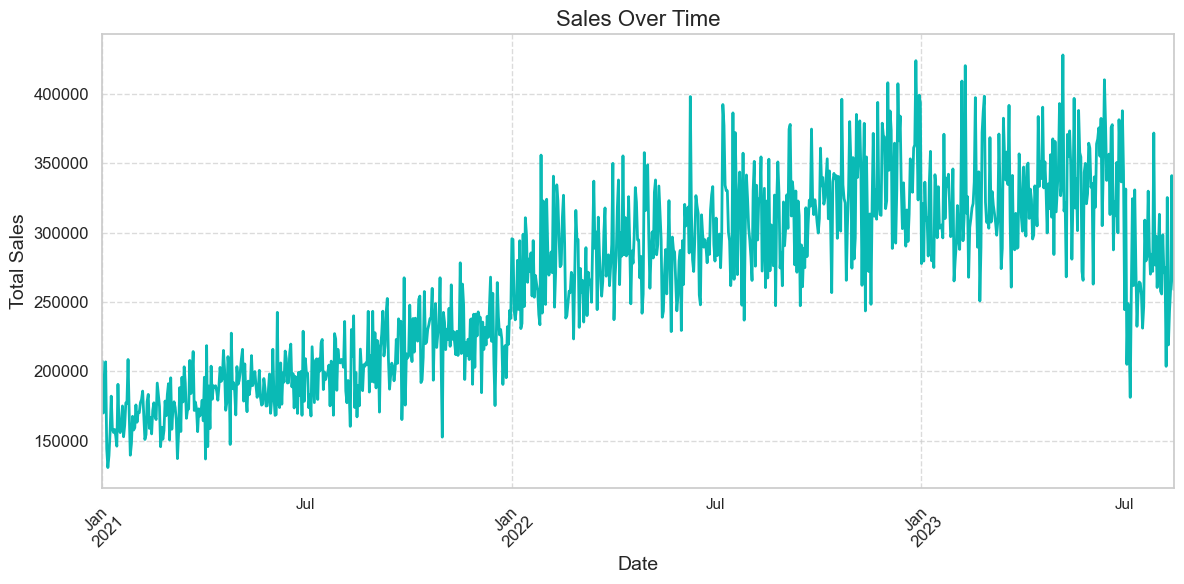

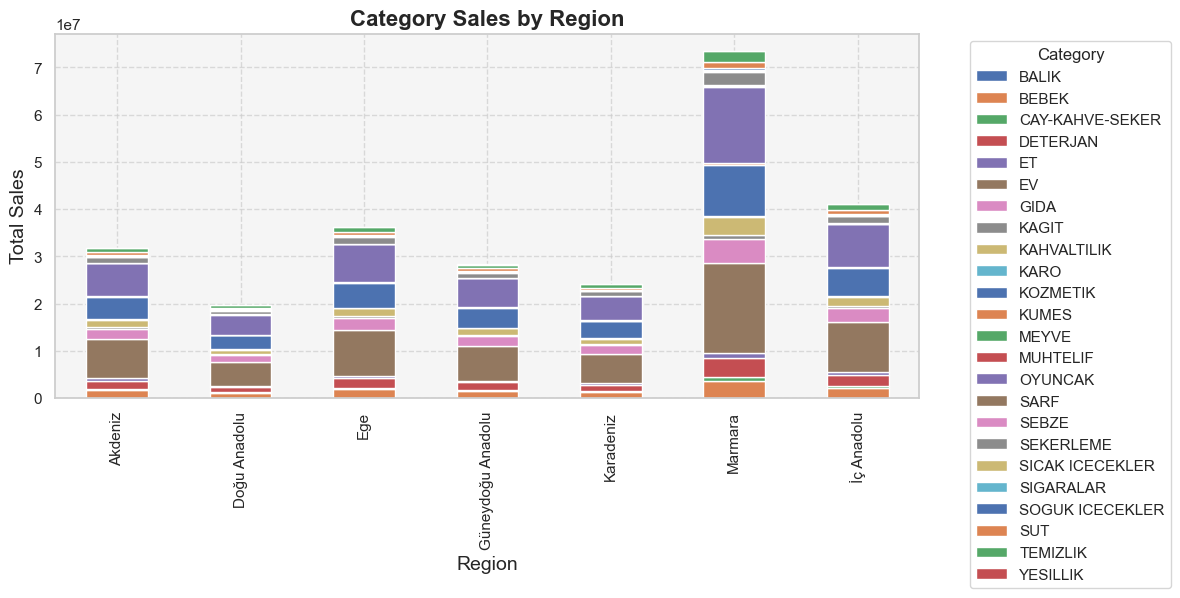

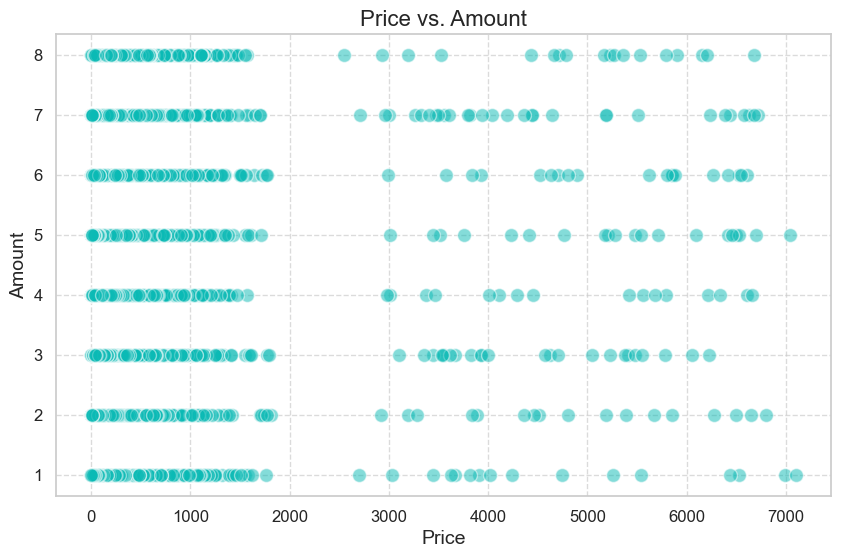

In [733]:
# Line Plot for Sales Over Time
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
df_original.groupby('DATE_')['TOTALPRICE'].sum().plot(kind='line', color='#0ABAB5', linewidth=2)
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Creating a pivot table
pivot = df_original.pivot_table(values='TOTALPRICE', index='REGION', columns='CATEGORY1', aggfunc='sum', fill_value=0)
# Setting the style
sns.set(style="whitegrid")
# Creating the stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))
pivot.plot(kind='bar', stacked=True, ax=ax)
# Adding titles and labels
plt.title('Category Sales by Region', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales', fontsize=14)
plt.xlabel('Region', fontsize=14)
# Customizing the legend
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adding grid and customizing the grid style
plt.grid(True, linestyle='--', alpha=0.7)
# Adding background color
ax.set_facecolor('#f5f5f5')
# Adjusting the layout to make space for the legend
plt.tight_layout()
# Show the plot
plt.show()


# Scatter Plot for Price vs. Amount
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(df_original['PRICE'], df_original['AMOUNT'], alpha=0.5, c='#0ABAB5', edgecolors='w', s=100)
plt.title('Price vs. Amount', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



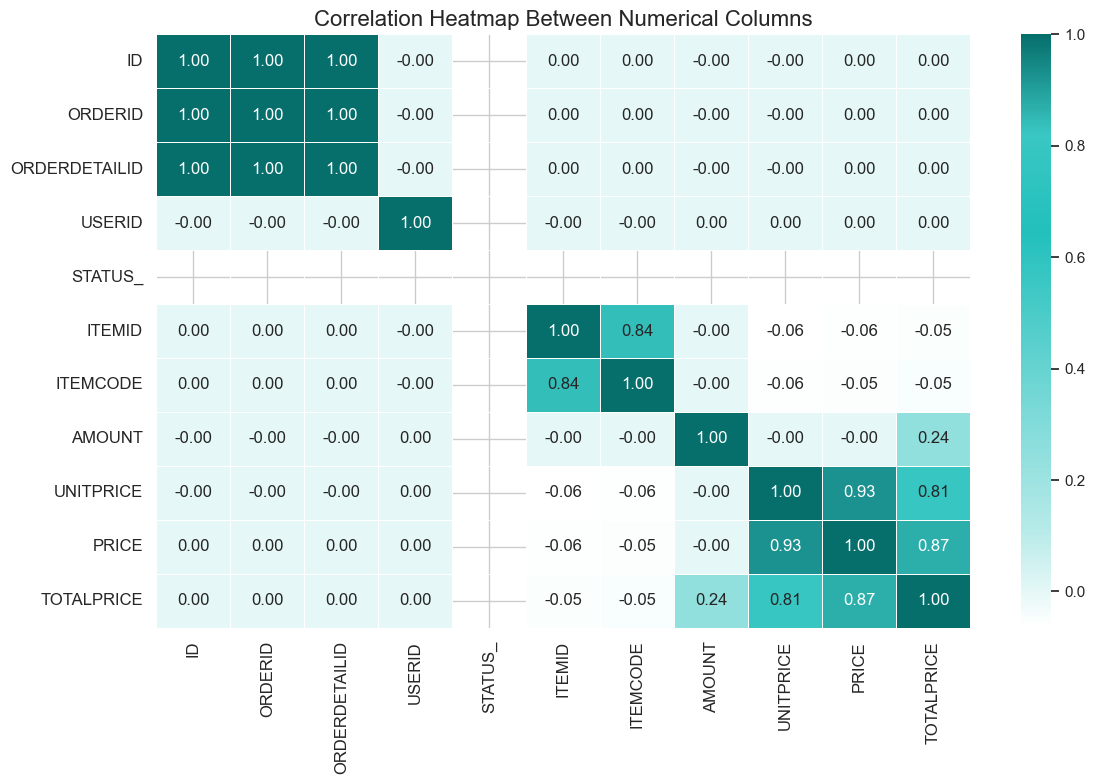

In [734]:
# Create a custom color map using the specified color
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', 
                                               ['#FFFFFF', '#b5eae8','#84dcda','#53cecb','#22c0bc','#3ac7c3','#066f6c' ], N=256)

# Select only numerical columns from the DataFrame
temp = df_original.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = temp.corr()

# Enhanced Heatmap for Correlation Between Numerical Columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap Between Numerical Columns', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


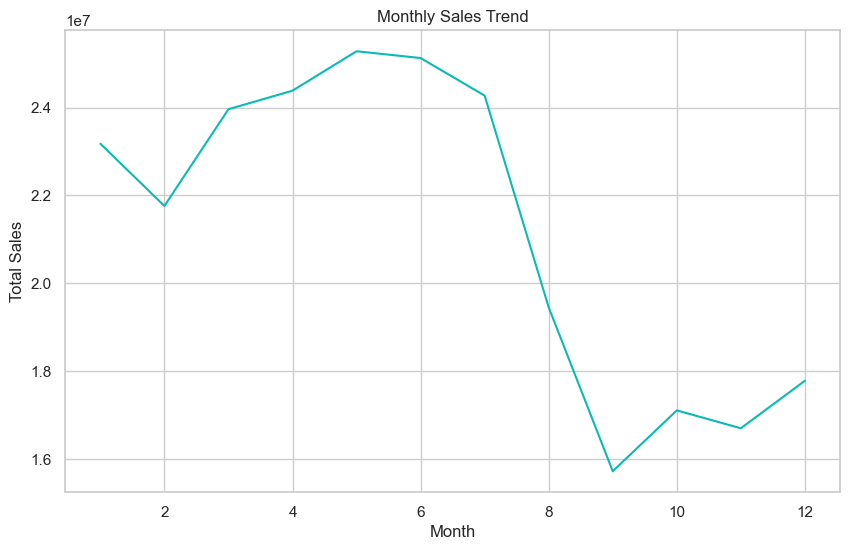

In [735]:
# Line plot for monthly sales trend 
df = df_original.copy()
df['Month'] = df['DATE_'].dt.month  # Extract month number
monthly_sales = df.groupby('Month')['TOTALPRICE'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend',c='#0ABAB5', figsize=(10, 6))
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()


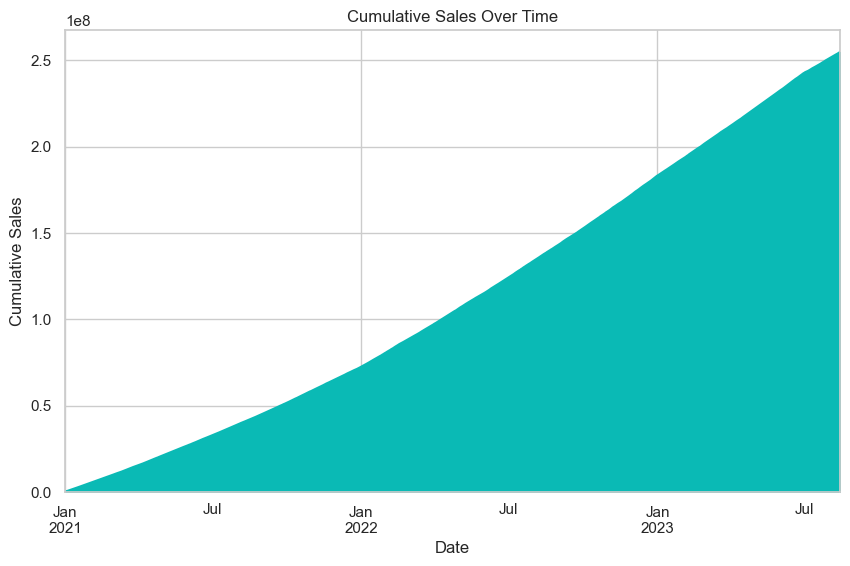

In [736]:
# Area chart for cumulative sales over time
cumulative_sales = df.groupby('DATE_')['TOTALPRICE'].sum().cumsum()
cumulative_sales.plot(kind='area', title='Cumulative Sales Over Time', figsize=(10, 6),color='#0ABAB5')
plt.ylabel('Cumulative Sales')
plt.xlabel('Date')
plt.show()

### Data Cleaning

In [865]:
# Work on a copy from the original data frame
df = df_original.copy()


In [866]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()
df.head()

,id,orderid,orderdetailid,date_,userid,username_,namesurname,status_,itemid,itemcode,...,category3,category4,brand,usergender,userbirthdate,region,city,town,district,addresstext
0,1,1,2,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,7438,22961,...,KITAP,KITAPLAR,KITAPLAR,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
1,2,1,4,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,12188,5482,...,HASERE OLDURUCULER,MAKINE LIKIT,DETAN,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
2,3,1,1,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,16347,30000,...,GOFRET,MUZLU,ULKER,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
3,4,1,5,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,21297,44140,...,CAMASIR YUMUSATICILAR,KLASIK,VERNEL,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
4,5,1,3,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,19984,31325,...,BAKLIYAT,FASULYELER,BIZIM,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...


In [867]:
# Handling missing values
df['brand'].fillna('unknown', inplace=True)
df['category4'].fillna('unknown', inplace=True)
df.info()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_30940\3641911498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('unknown', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30940\3641911498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1000000 non-null  int64         
 1   orderid        1000000 non-null  int64         
 2   orderdetailid  1000000 non-null  int64         
 3   date_          1000000 non-null  datetime64[ns]
 4   userid         1000000 non-null  int64         
 5   username_      1000000 non-null  object        
 6   namesurname    1000000 non-null  object        
 7   status_        1000000 non-null  int64         
 8   itemid         1000000 non-null  int64         
 9   itemcode       1000000 non-null  int64         
 10  itemname       1000000 non-null  object        
 11  amount         1000000 non-null  int64         
 12  unitprice      1000000 non-null  float64       
 13  price          1000000 non-null  float64       
 14  totalprice     1000000 non-null  fl

In [868]:
# Count the number of missing values 
num_columns_with_null = df.isnull().any().sum()
print("Number of columns with null values:", num_columns_with_null)

Number of columns with null values: 0


In [869]:
# Handling duplicate data
df.drop_duplicates()

df.shape

(1000000, 27)

Column 'id' has 0 outliers.


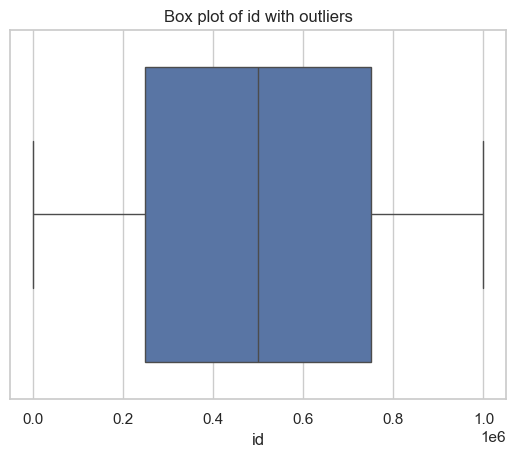

Column 'orderid' has 0 outliers.


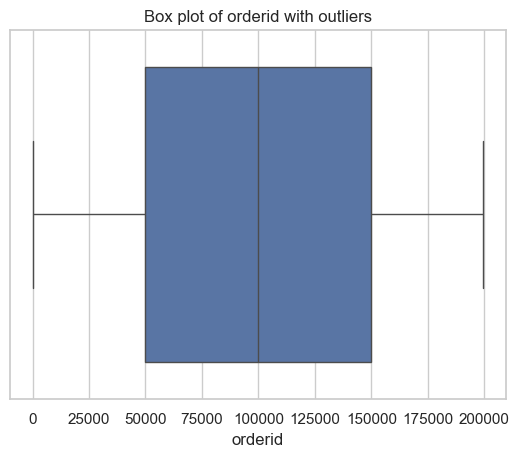

Column 'orderdetailid' has 0 outliers.


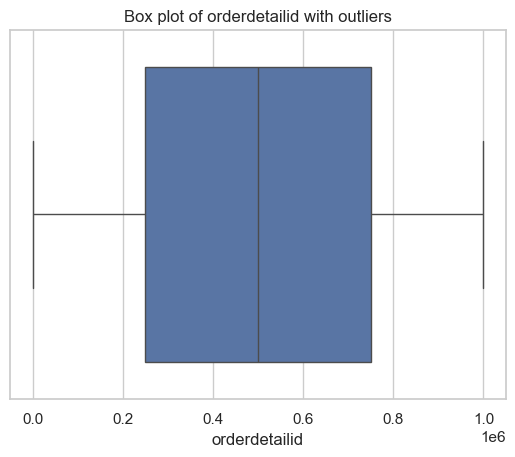

Column 'userid' has 0 outliers.


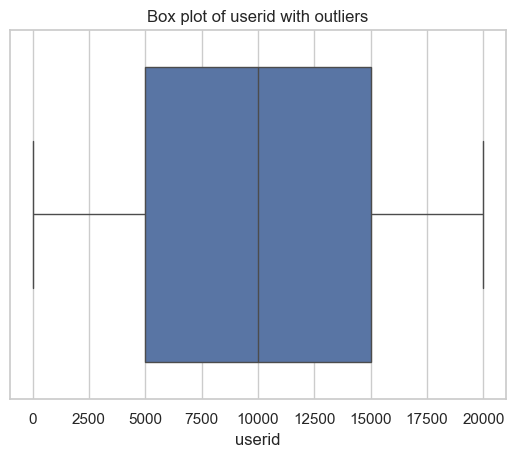

Column 'status_' has 0 outliers.


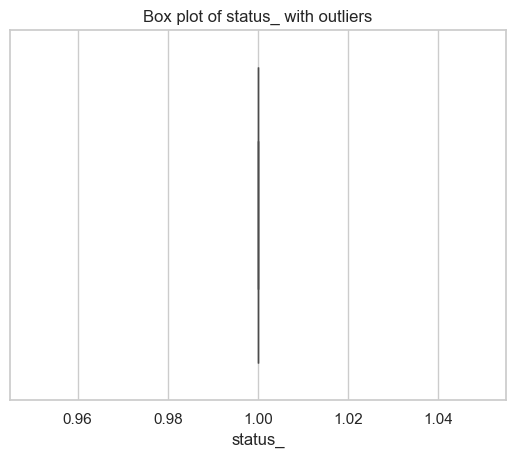

Column 'itemid' has 0 outliers.


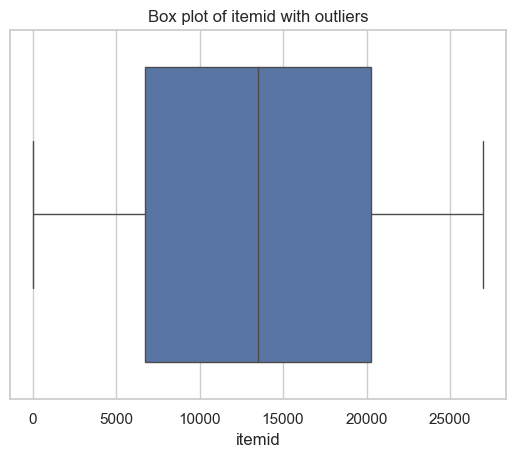

Column 'itemcode' has 0 outliers.


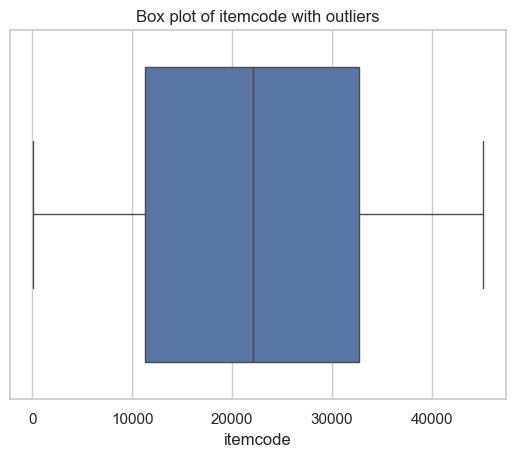

Column 'amount' has 0 outliers.


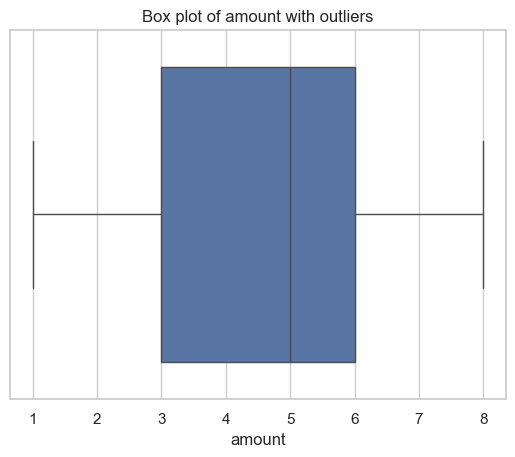

Column 'unitprice' has 76647 outliers.
Outlier indices: [    19     53     70 ... 999965 999966 999989]


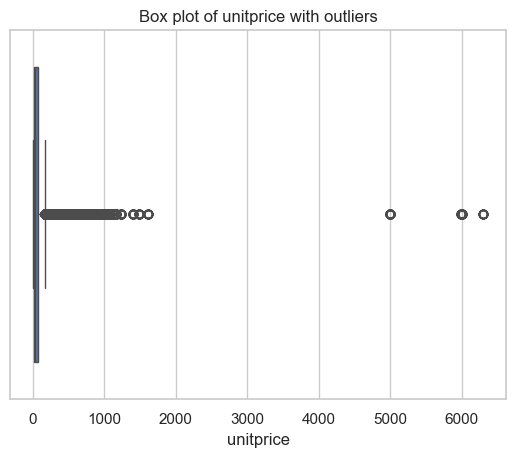

Column 'price' has 77340 outliers.
Outlier indices: [    19     33     70 ... 999994 999995 999998]


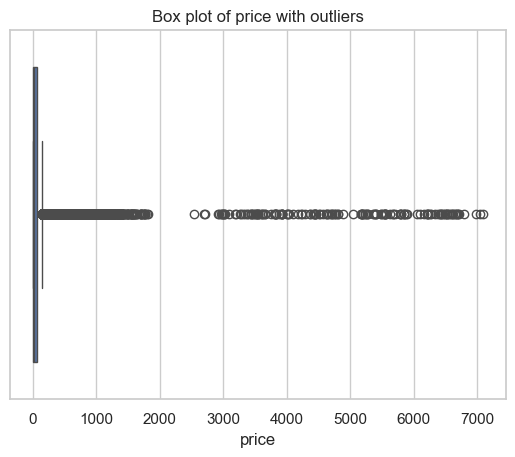

Column 'totalprice' has 89148 outliers.
Outlier indices: [     7     10     19 ... 999994 999995 999998]


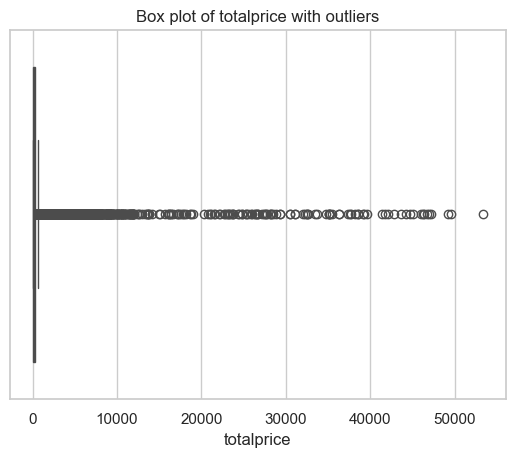

Original DataFrame shape: (1000000, 27)


In [870]:
def detect_outliers(df):
       
    # Convert data to numpy array if it's a pandas Series
    if isinstance(df, pd.Series):
        df = df.values
    
    # Calculate first and third quartile
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = np.where((df < lower_bound) | (df > upper_bound))[0]
    
    return outliers

# Filter numerical columns (excluding datetime and categorical)
specific_columns = df.select_dtypes(include=['number']).columns

for col in specific_columns:
    outliers = detect_outliers(df[col])
    print(f"Column '{col}' has {len(outliers)} outliers.")
    if len(outliers) > 0:
        print(f"Outlier indices: {outliers}")
    
    # Visualize outliers using a box plot
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} with outliers')
    plt.show()
print(f"Original DataFrame shape: {df.shape}")


Column 'unitprice' has 76647 outliers.
Outlier indices: [    19     53     70 ... 999965 999966 999989]
Column 'price' has 77340 outliers.
Outlier indices: [    19     33     70 ... 999994 999995 999998]


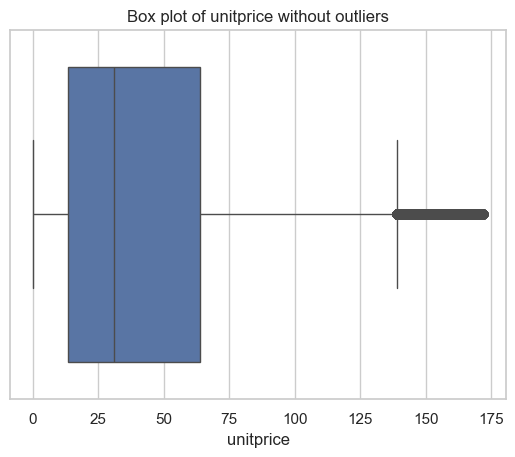

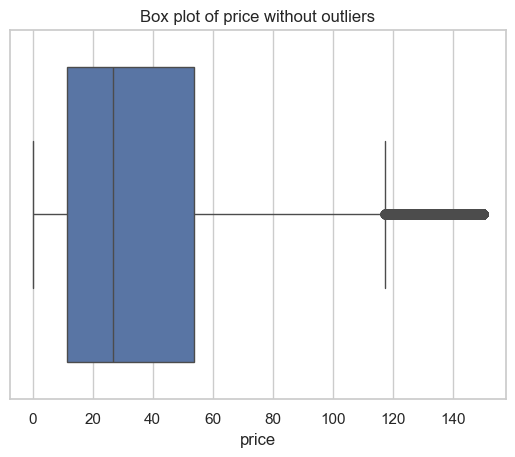

Cleaned DataFrame shape: (906155, 27)


In [871]:
def detect_outliers(df):
    # Convert data to numpy array if it's a pandas Series
    if isinstance(df, pd.Series):
        df = df.values
    
    # Calculate first and third quartile
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = np.where((df < lower_bound) | (df > upper_bound))[0]
    
    return outliers

# Filter numerical columns (excluding datetime and categorical)
specific_columns = ['unitprice', 'price']
outlier_indices = set()

for col in specific_columns:
    outliers = detect_outliers(df[col])
    print(f"Column '{col}' has {len(outliers)} outliers.")
    if len(outliers) > 0:
        print(f"Outlier indices: {outliers}")
        outlier_indices.update(outliers)

# Convert to a list to use for indexing
outlier_indices = list(outlier_indices)

# Remove the rows containing outliers
df = df.drop(outlier_indices)


# Visualize the cleaned data using box plots
for col in specific_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} without outliers')
    plt.show()
print(f"Cleaned DataFrame shape: {df.shape}")


### Data Taransformation

In [872]:
# Correcting the calculation for (TOTALPRICE) column
df['totalprice'] = df['amount'] * df['price']

In [873]:
# Change the values in USERGENDER from categorical to numerical in Binary format
df['usergender'] = df['usergender'].replace({'K': 0, 'E': 1})
df.info()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_30940\1513963777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['usergender'] = df['usergender'].replace({'K': 0, 'E': 1})


<class 'pandas.core.frame.DataFrame'>
Index: 906155 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             906155 non-null  int64         
 1   orderid        906155 non-null  int64         
 2   orderdetailid  906155 non-null  int64         
 3   date_          906155 non-null  datetime64[ns]
 4   userid         906155 non-null  int64         
 5   username_      906155 non-null  object        
 6   namesurname    906155 non-null  object        
 7   status_        906155 non-null  int64         
 8   itemid         906155 non-null  int64         
 9   itemcode       906155 non-null  int64         
 10  itemname       906155 non-null  object        
 11  amount         906155 non-null  int64         
 12  unitprice      906155 non-null  float64       
 13  price          906155 non-null  float64       
 14  totalprice     906155 non-null  float64       
 15  categ

C:\Users\lenovo\AppData\Local\Temp\ipykernel_30940\1970591168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")


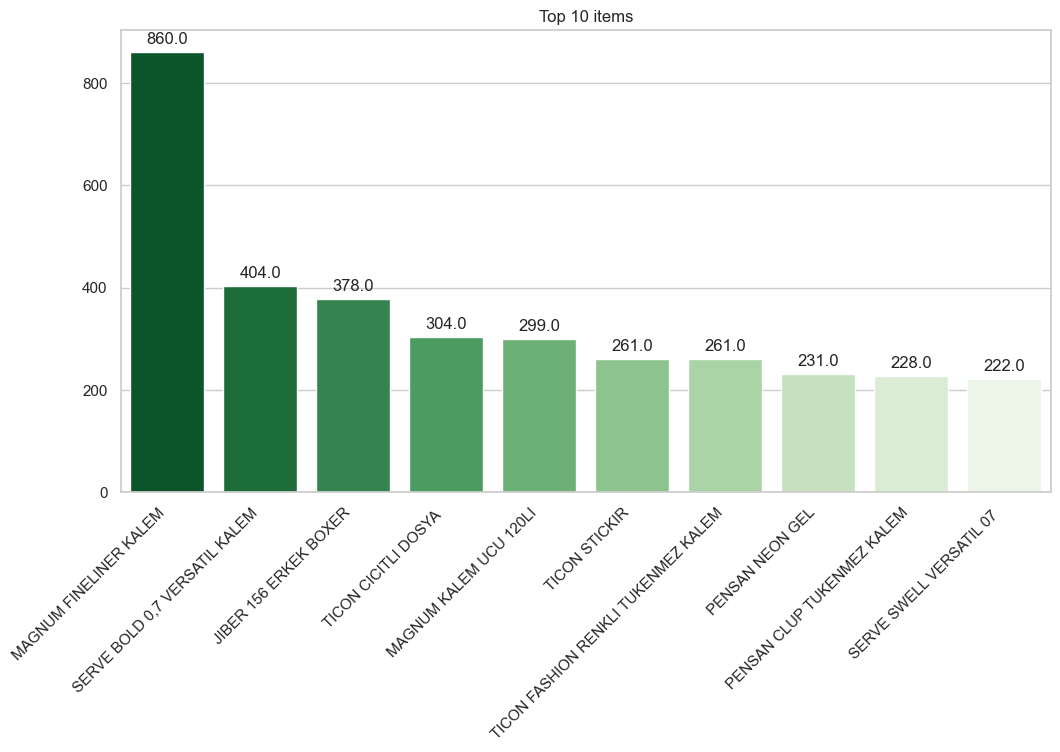

In [874]:
# Top 10 items
val_counts = dict(df["itemname"].value_counts()[:10])
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add a title
plt.title('Top 10 items')

# Add count labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # 9 points vertical offset
                     textcoords = 'offset points')

# Show the plot
plt.show()

### Feature Selection & data reduction

In [875]:
df.head()

,id,orderid,orderdetailid,date_,userid,username_,namesurname,status_,itemid,itemcode,...,category3,category4,brand,usergender,userbirthdate,region,city,town,district,addresstext
0,1,1,2,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,7438,22961,...,KITAP,KITAPLAR,KITAPLAR,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
1,2,1,4,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,12188,5482,...,HASERE OLDURUCULER,MAKINE LIKIT,DETAN,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
2,3,1,1,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,16347,30000,...,GOFRET,MUZLU,ULKER,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
3,4,1,5,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,21297,44140,...,CAMASIR YUMUSATICILAR,KLASIK,VERNEL,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
4,5,1,3,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,19984,31325,...,BAKLIYAT,FASULYELER,BIZIM,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...


In [876]:
# Drop useless columns
df.drop(columns=['id','status_','username_','namesurname','itemcode','itemname',],axis=1, inplace=True)
df.shape

(906155, 21)

In [877]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906155 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   orderid        906155 non-null  int64         
 1   orderdetailid  906155 non-null  int64         
 2   date_          906155 non-null  datetime64[ns]
 3   userid         906155 non-null  int64         
 4   itemid         906155 non-null  int64         
 5   amount         906155 non-null  int64         
 6   unitprice      906155 non-null  float64       
 7   price          906155 non-null  float64       
 8   totalprice     906155 non-null  float64       
 9   category1      906155 non-null  object        
 10  category2      906155 non-null  object        
 11  category3      906155 non-null  object        
 12  category4      906155 non-null  object        
 13  brand          906155 non-null  object        
 14  usergender     906155 non-null  int64         
 15  userb

## Market Basket analysis




In [750]:
#Detecting the least frequent items
val_counts = df["itemid"].value_counts()
val_counts.tail(10)

itemid
8762     10
2449     10
22363    10
10696    10
8086      9
13492     9
8712      9
11481     6
7803      5
1354      5
Name: count, dtype: int64

In [751]:
# Recover transaction itemsets from orders DataFrame.
transactions = df.groupby("orderid").category1.unique()

# Print transactions header.
transactions.head()

orderid
1    [EV, TEMIZLIK, SEKERLEME, DETERJAN, GIDA]
2              [EV, SEKERLEME, KOZMETIK, GIDA]
3                                  [SEKERLEME]
4                            [EV, KAGIT, GIDA]
5                                    [OYUNCAK]
Name: category1, dtype: object

In [752]:
# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [753]:
onehot.head()

,BALIK,BEBEK,CAY-KAHVE-SEKER,DETERJAN,ET,EV,GIDA,KAGIT,KAHVALTILIK,KARO,...,OYUNCAK,SARF,SEBZE,SEKERLEME,SICAK ICECEKLER,SIGARALAR,SOGUK ICECEKLER,SUT,TEMIZLIK,YESILLIK
0,False,False,False,True,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [754]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

BALIK              0.005410
BEBEK              0.116707
CAY-KAHVE-SEKER    0.051146
DETERJAN           0.154836
ET                 0.048690
EV                 0.810105
GIDA               0.422165
KAGIT              0.049163
KAHVALTILIK        0.170573
KARO               0.002364
KOZMETIK           0.410750
KUMES              0.016515
MEYVE              0.021284
MUHTELIF           0.003910
OYUNCAK            0.213462
SARF               0.026689
SEBZE              0.024686
SEKERLEME          0.237949
SICAK ICECEKLER    0.028148
SIGARALAR          0.017354
SOGUK ICECEKLER    0.114195
SUT                0.142938
TEMIZLIK           0.132566
YESILLIK           0.005263
dtype: float64

In [755]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

3    43705
4    40581
2    38619
1    31077
5    27268
6    11879
7     3095
8      430
9       18
Name: count, dtype: int64

In [756]:
# Add GIDA and EV to DataFrame.
temp=onehot.copy()
temp['Ev-GIDA'] = temp['EV'] & temp['GIDA']

# Print support value.
temp['Ev-GIDA'].mean(axis = 0)

0.3501006752359258

In [757]:
# Merge EV and GIDA.
temp['Ev-GIDA'] = temp['EV'] | temp['GIDA']

# Print support values for Ev-GIDA, EV, and GIDA.
temp[['Ev-GIDA','EV','GIDA']].mean(axis=0)

Ev-GIDA    0.882169
EV         0.810105
GIDA       0.422165
dtype: float64

In [758]:
# Compute joint support for EV and GIDA.
joint_support = (temp['EV'] & temp['GIDA']).mean()

# Print confidence metric for EV -> GIDA.
joint_support / temp['EV'].mean()

0.43216695433861607

In [759]:
# Print confidence for GIDA -> EV.
joint_support / temp['GIDA'].mean()

0.8292985498867852

### Applying the Apriori algorithm


In [760]:
# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets.head(100)

,support,itemsets
0,0.116707,(1)
1,0.051146,(2)
2,0.154836,(3)
3,0.048690,(4)
4,0.810105,(5)
...,...,...
95,0.029974,"(14, 22)"
96,0.028570,"(17, 20)"
97,0.036640,"(17, 21)"
98,0.033599,"(17, 22)"


In [761]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets.head(100)

,support,itemsets
0,0.005410,(BALIK)
1,0.116707,(BEBEK)
2,0.051146,(CAY-KAHVE-SEKER)
3,0.154836,(DETERJAN)
4,0.048690,(ET)
...,...,...
95,0.350101,"(EV, GIDA)"
96,0.041328,"(EV, KAGIT)"
97,0.142379,"(EV, KAHVALTILIK)"
98,0.002044,"(EV, KARO)"


In [762]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 2, use_colnames = True)

### Computing association rules from Apriori output


In [763]:
# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(EV),0.005410,0.810105,0.004510,0.833647,1.029060,0.000127,1.141515,0.028393
1,(EV),(BALIK),0.810105,0.005410,0.004510,0.005567,1.029060,0.000127,1.000158,0.148709
2,(BALIK),(GIDA),0.005410,0.422165,0.002451,0.453008,1.073058,0.000167,1.056386,0.068455
3,(GIDA),(BALIK),0.422165,0.005410,0.002451,0.005805,1.073058,0.000167,1.000398,0.117826
4,(BALIK),(KOZMETIK),0.005410,0.410750,0.002436,0.450188,1.096015,0.000213,1.071730,0.088080
5,(KOZMETIK),(BALIK),0.410750,0.005410,0.002436,0.005929,1.096015,0.000213,1.000523,0.148670
6,(BALIK),(OYUNCAK),0.005410,0.213462,0.001266,0.234023,1.096319,0.000111,1.026842,0.088335
7,(OYUNCAK),(BALIK),0.213462,0.005410,0.001266,0.005931,1.096319,0.000111,1.000524,0.111701
8,(BALIK),(SEKERLEME),0.005410,0.237949,0.001302,0.240602,1.011145,0.000014,1.003492,0.011082
9,(SEKERLEME),(BALIK),0.237949,0.005410,0.001302,0.005470,1.011145,0.000014,1.000061,0.014464


### Pruning association rules

In [764]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(EV),0.005410,0.810105,0.004510,0.833647,1.029060,0.000127,1.141515,0.028393
1,(BALIK),(GIDA),0.005410,0.422165,0.002451,0.453008,1.073058,0.000167,1.056386,0.068455
2,(BALIK),(KOZMETIK),0.005410,0.410750,0.002436,0.450188,1.096015,0.000213,1.071730,0.088080
3,(BALIK),(OYUNCAK),0.005410,0.213462,0.001266,0.234023,1.096319,0.000111,1.026842,0.088335
4,(BALIK),(SEKERLEME),0.005410,0.237949,0.001302,0.240602,1.011145,0.000014,1.003492,0.011082
5,(BEBEK),(CAY-KAHVE-SEKER),0.116707,0.051146,0.006346,0.054372,1.063072,0.000376,1.003411,0.067169
6,(CAY-KAHVE-SEKER),(BEBEK),0.051146,0.116707,0.006346,0.124068,1.063072,0.000376,1.008404,0.062528
7,(BEBEK),(DETERJAN),0.116707,0.154836,0.018767,0.160807,1.038559,0.000697,1.007114,0.042033
8,(DETERJAN),(BEBEK),0.154836,0.116707,0.018767,0.121207,1.038559,0.000697,1.005121,0.043930
9,(BEBEK),(ET),0.116707,0.048690,0.005959,0.051061,1.048689,0.000277,1.002498,0.052563


In [765]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(EV),0.005410,0.810105,0.004510,0.833647,1.029060,0.000127,1.141515,0.028393
1,(BALIK),(GIDA),0.005410,0.422165,0.002451,0.453008,1.073058,0.000167,1.056386,0.068455
2,(BALIK),(KOZMETIK),0.005410,0.410750,0.002436,0.450188,1.096015,0.000213,1.071730,0.088080
3,(BALIK),(OYUNCAK),0.005410,0.213462,0.001266,0.234023,1.096319,0.000111,1.026842,0.088335
4,(BALIK),(SEKERLEME),0.005410,0.237949,0.001302,0.240602,1.011145,0.000014,1.003492,0.011082
...,...,...,...,...,...,...,...,...,...,...
349,(SOGUK ICECEKLER),(SUT),0.114195,0.142938,0.017135,0.150051,1.049761,0.000812,1.008368,0.053513
350,(SOGUK ICECEKLER),(TEMIZLIK),0.114195,0.132566,0.015920,0.139410,1.051625,0.000782,1.007952,0.055419
351,(TEMIZLIK),(SOGUK ICECEKLER),0.132566,0.114195,0.015920,0.120091,1.051625,0.000782,1.006700,0.056593
352,(SUT),(TEMIZLIK),0.142938,0.132566,0.019723,0.137984,1.040869,0.000774,1.006285,0.045813


### The leverage metric


In [766]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(EV),0.005410,0.810105,0.004510,0.833647,1.029060,0.000127,1.141515,0.028393
1,(BALIK),(GIDA),0.005410,0.422165,0.002451,0.453008,1.073058,0.000167,1.056386,0.068455
2,(BALIK),(KOZMETIK),0.005410,0.410750,0.002436,0.450188,1.096015,0.000213,1.071730,0.088080
3,(BALIK),(OYUNCAK),0.005410,0.213462,0.001266,0.234023,1.096319,0.000111,1.026842,0.088335
4,(BALIK),(SEKERLEME),0.005410,0.237949,0.001302,0.240602,1.011145,0.000014,1.003492,0.011082
...,...,...,...,...,...,...,...,...,...,...
349,(SOGUK ICECEKLER),(SUT),0.114195,0.142938,0.017135,0.150051,1.049761,0.000812,1.008368,0.053513
350,(SOGUK ICECEKLER),(TEMIZLIK),0.114195,0.132566,0.015920,0.139410,1.051625,0.000782,1.007952,0.055419
351,(TEMIZLIK),(SOGUK ICECEKLER),0.132566,0.114195,0.015920,0.120091,1.051625,0.000782,1.006700,0.056593
352,(SUT),(TEMIZLIK),0.142938,0.132566,0.019723,0.137984,1.040869,0.000774,1.006285,0.045813


In [767]:
rules_zhang= rules[rules['zhangs_metric'] > 0]

### Visualizing patterns in metrics

In [768]:
# Creating the custom colormap
colors = ['#FFFFFF', '#b5eae8', '#84dcda', '#53cecb', '#22c0bc', '#3ac7c3', '#066f6c']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

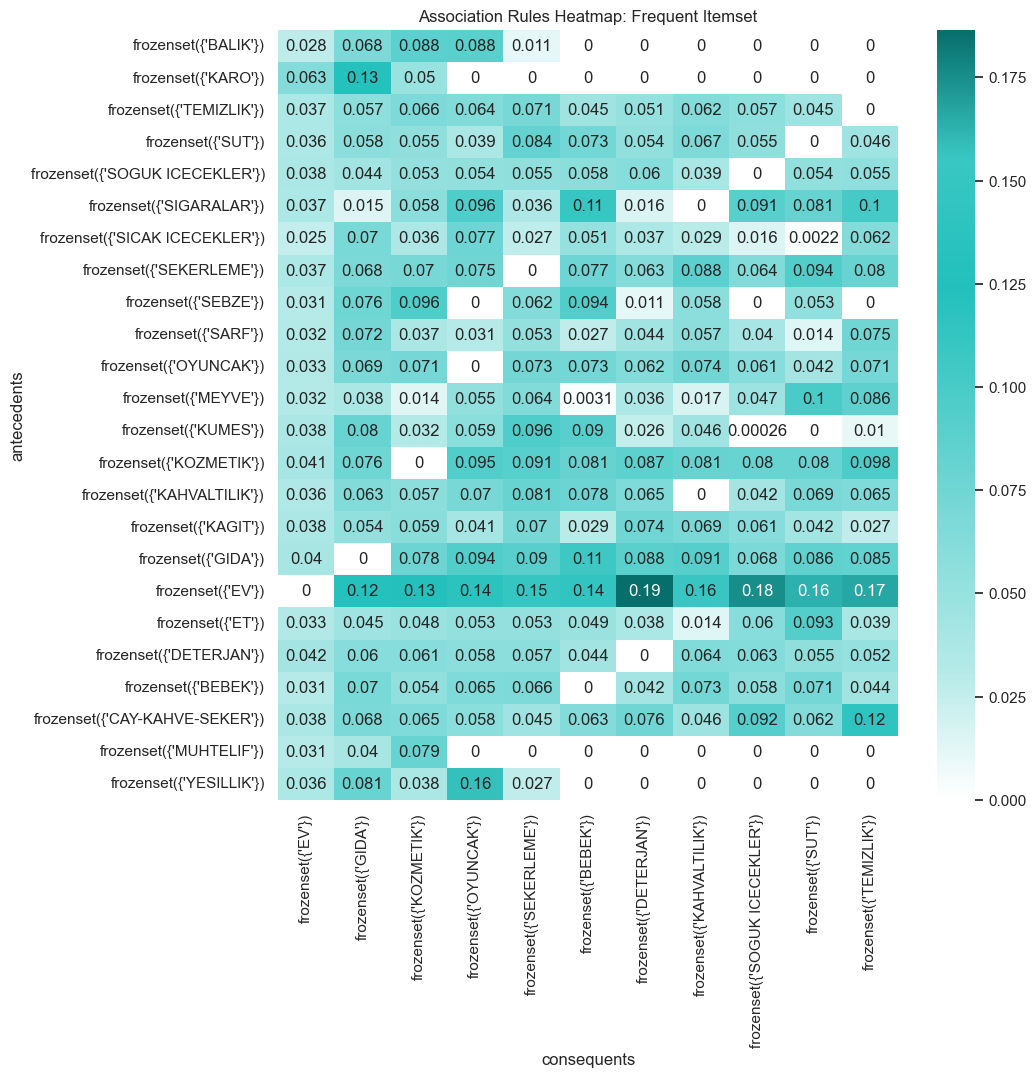

In [769]:
# Creating matrix and heatmap of association
association = rules_zhang.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)
plt.figure(figsize=(10, 10))
sns.heatmap(association, annot=True, cmap=custom_cmap)
plt.title('Association Rules Heatmap: Frequent Itemset')
plt.show()

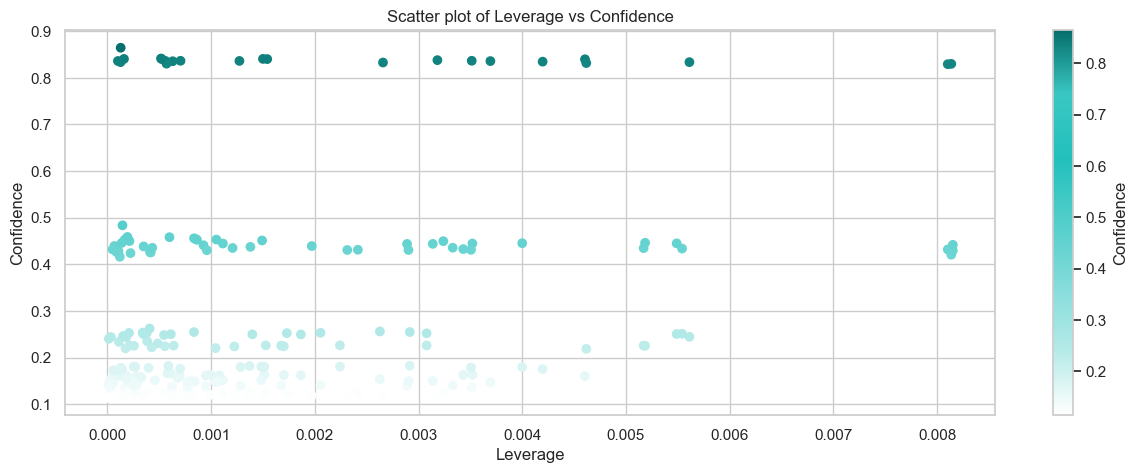

In [770]:
# Plot leverage against confidence with color mapping based on confidence
plt.figure(figsize=(15, 5))
sc = plt.scatter(x=rules['leverage'], y=rules['confidence'], c=rules['confidence'], cmap=custom_cmap)
plt.colorbar(sc, label='Confidence')
plt.xlabel('Leverage')
plt.ylabel('Confidence')
plt.title('Scatter plot of Leverage vs Confidence')
plt.show()

In [771]:
# Assuming 'rules' contains the DataFrame you want to sort
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
137,(EV),(GIDA),0.810105,0.422165,0.350101,0.432167,1.023692,0.008103,1.017615,0.121879
138,(GIDA),(EV),0.422165,0.810105,0.350101,0.829299,1.023692,0.008103,1.112438,0.040053
144,(EV),(KOZMETIK),0.810105,0.410750,0.340887,0.420794,1.024453,0.008137,1.017341,0.125698
145,(KOZMETIK),(EV),0.410750,0.810105,0.340887,0.829915,1.024453,0.008137,1.116468,0.040508
158,(SEKERLEME),(EV),0.237949,0.810105,0.198376,0.833689,1.029113,0.005612,1.141809,0.037122
...,...,...,...,...,...,...,...,...,...,...
4,(BALIK),(SEKERLEME),0.005410,0.237949,0.001302,0.240602,1.011145,0.000014,1.003492,0.011082
335,(YESILLIK),(SEKERLEME),0.005263,0.237949,0.001286,0.244444,1.027296,0.000034,1.008596,0.026711
3,(BALIK),(OYUNCAK),0.005410,0.213462,0.001266,0.234023,1.096319,0.000111,1.026842,0.088335
174,(KARO),(GIDA),0.002364,0.422165,0.001144,0.483871,1.146166,0.000146,1.119556,0.127828


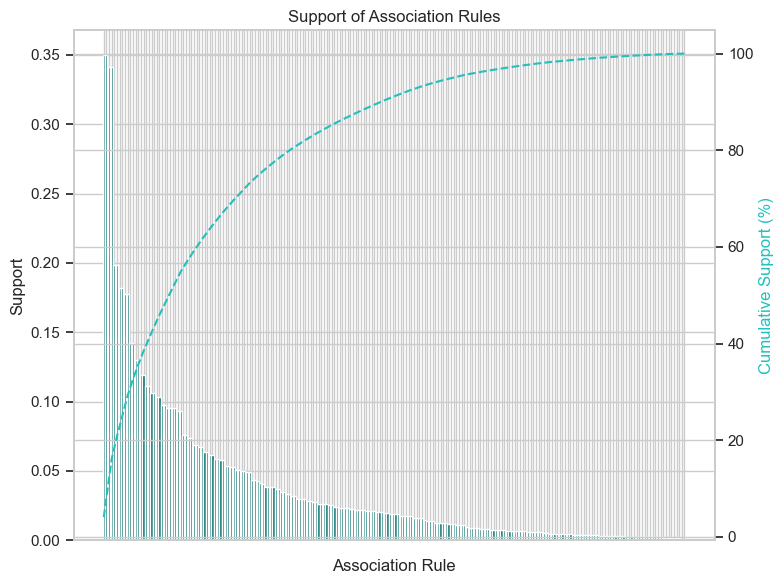

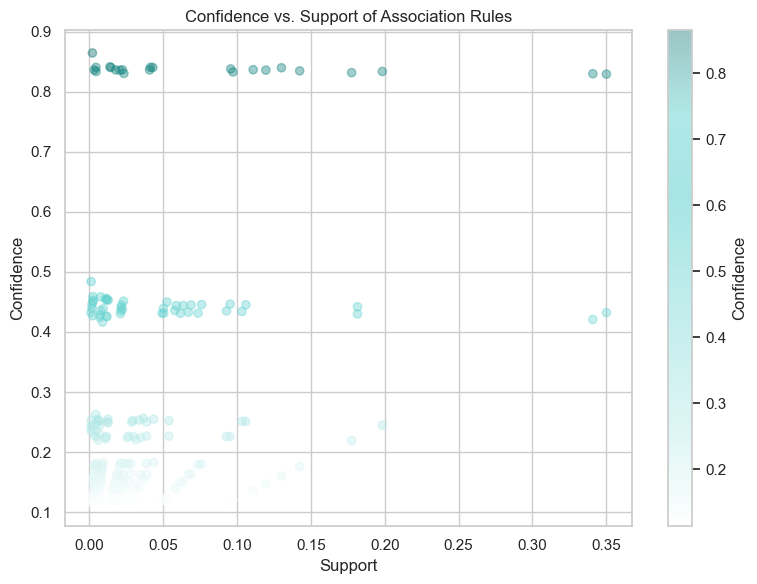

In [772]:
# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center', color=colors[-1])
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color=colors[4], linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', color=colors[4])

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
sc = plt.scatter(rules['support'], rules['confidence'], alpha=0.4, c=rules['confidence'], cmap=custom_cmap)
plt.colorbar(sc, label='Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [773]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(75)



C:\Users\lenovo\AppData\Local\Temp\ipykernel_30940\96083647.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.15))  # Add legend for node colors (optional)


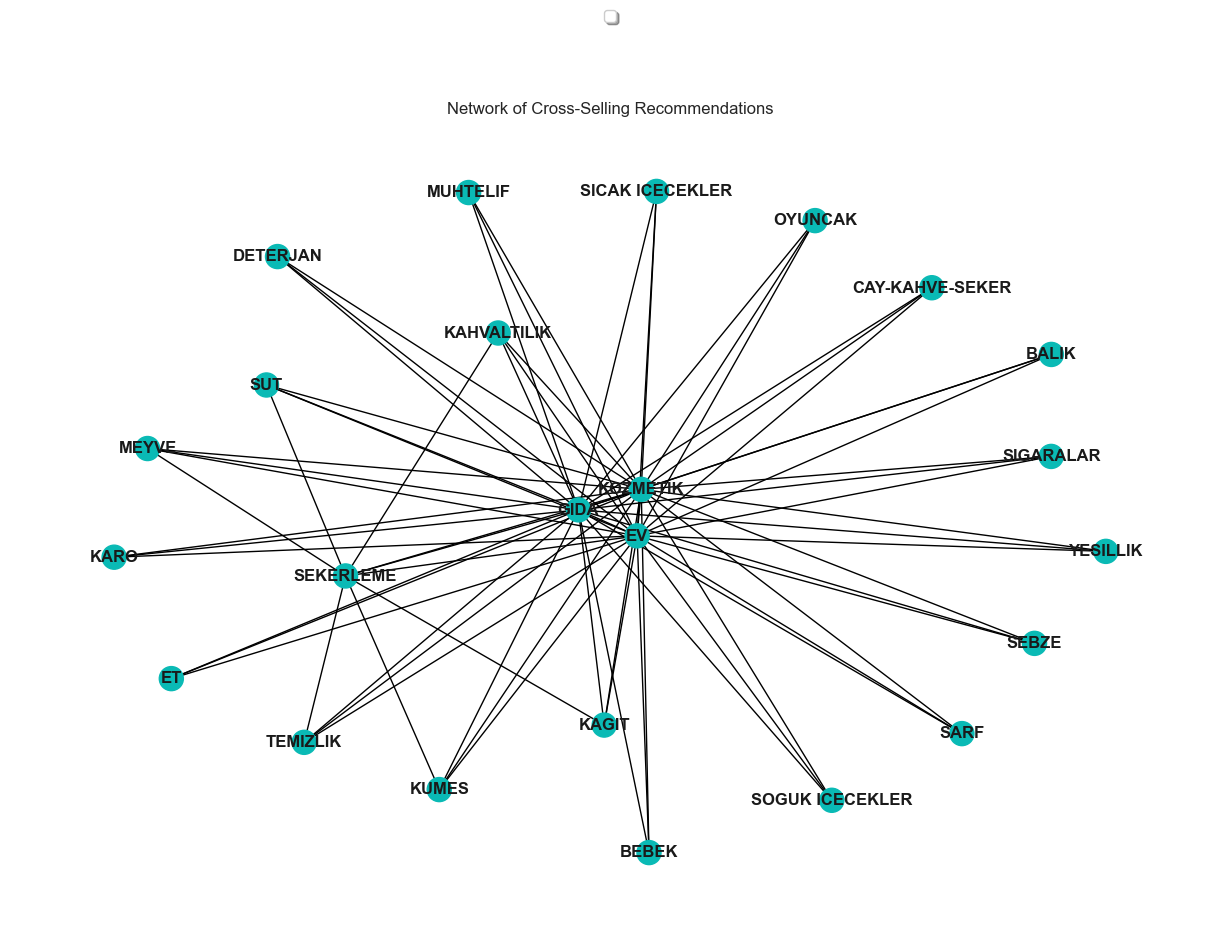

In [774]:
def create_network_diagram(top_rules):
    # G = nx.DiGraph()  # Use directed graph for clear antecedent-consequent relationships
    G = nx.Graph()  # Use an undirected graph for no direction on edges

    rule_type="cross-selling"
    # Add nodes with descriptive labels
    for idx, row in top_rules.iterrows():
        antecedent = list(row['antecedents'])[0]
        consequents = list(row['consequents'])
        antecedent_label = f"**{antecedent}**"  # Bold antecedent label
        G.add_node(antecedent, label=antecedent_label)
        for consequent in consequents:
            consequent_label = consequent
            G.add_node(consequent, label=consequent_label)
            G.add_edge(antecedent, consequent)

    # Adjust node positions for better visualization (optional)
    pos = nx.spring_layout(G, k=0.5)  # Adjust k for better spread

    # Set node colors based on rule type (example)
    def get_node_color(node, rule_type):
        if rule_type == "cross-selling":
            return '#0ABAB5'  # Color for cross-selling
        else:
            return 'gray'  # Default color

    node_colors = [get_node_color(node, rule_type) for node in G.nodes()]

    # Create the visualization
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos=pos, with_labels=True, node_color=node_colors, edge_color='black', font_weight='bold')

    # Customize plot elements
    plt.title(f'Network of {rule_type.title()} Recommendations')
    plt.axis('off')
    plt.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.5, 1.15))  # Add legend for node colors (optional)

    plt.show()


# Create network diagram for cross-selling recommendations
create_network_diagram(top_cross_selling)




### Suggesting a Product to Users at the Basket Stage

In [775]:
# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

Cross-Selling Recommendations:
Customers who bought 'KARO' also bought 'EV'.
Customers who bought 'KUMES' also bought 'EV'.
Customers who bought 'KAGIT' also bought 'EV'.
Customers who bought 'YESILLIK' also bought 'EV'.
Customers who bought 'SIGARALAR' also bought 'EV'.
Customers who bought 'CAY-KAHVE-SEKER' also bought 'EV'.
Customers who bought 'DETERJAN' also bought 'EV'.
Customers who bought 'SOGUK ICECEKLER' also bought 'EV'.
Customers who bought 'TEMIZLIK' also bought 'EV'.
Customers who bought 'SARF' also bought 'EV'.
Customers who bought 'MEYVE' also bought 'EV'.
Customers who bought 'ET' also bought 'EV'.
Customers who bought 'MUHTELIF' also bought 'EV'.
Customers who bought 'SUT' also bought 'EV'.
Customers who bought 'SEBZE' also bought 'EV'.
Customers who bought 'KAHVALTILIK' also bought 'EV'.
Customers who bought 'SEKERLEME' also bought 'EV'.
Customers who bought 'BALIK' also bought 'EV'.
Customers who bought 'BEBEK' also bought 'EV'.
Customers who bought 'OYUNCAK' also b

In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906155 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   orderid        906155 non-null  int64         
 1   orderdetailid  906155 non-null  int64         
 2   date_          906155 non-null  datetime64[ns]
 3   userid         906155 non-null  int64         
 4   itemid         906155 non-null  int64         
 5   amount         906155 non-null  int64         
 6   unitprice      906155 non-null  float64       
 7   price          906155 non-null  float64       
 8   totalprice     906155 non-null  float64       
 9   category1      906155 non-null  object        
 10  category2      906155 non-null  object        
 11  category3      906155 non-null  object        
 12  category4      906155 non-null  object        
 13  brand          906155 non-null  object        
 14  usergender     906155 non-null  int64         
 15  userb

In [777]:
def check_product(item, df =df):
    product_name = df[df["category1"] == item]["category1"].unique()[0]
    return product_name

In [778]:
def recommend_product(item, df = df, qty = 5):
    products = item
    code_list = []
    name_list = []
    sorted_rules = rules.sort_values("lift", ascending=False)
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == products:
                code_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
                code_list = list(dict.fromkeys(code_list))
                
        # Print product name for the df 
    if len(code_list) <= 0:
        return "Invalid Product, try again!"
    else:
        for code in code_list:
            name_list.append(check_product(code))
    
    
    print(f"Recommended product(s) for {item} is/are:")
    for i, item in enumerate(name_list):
        print(i+1, item)

In [779]:
recommend_product("YESILLIK")

Recommended product(s) for YESILLIK is/are:
1 OYUNCAK
2 GIDA
3 KOZMETIK
4 EV
5 SEKERLEME


In [780]:
recommend_product("SEKERLEME")

Recommended product(s) for SEKERLEME is/are:
1 SUT
2 KAHVALTILIK
3 TEMIZLIK
4 BEBEK
5 OYUNCAK
6 KOZMETIK
7 GIDA
8 SOGUK ICECEKLER
9 DETERJAN
10 EV


In [781]:
temp = df[['category1', 'price']].copy()
temp=temp[temp['category1']=='EV']
data=temp.copy()
x= data['price'].mean()
data['price']


0         20.42
5         36.32
9         70.66
11        89.22
13        49.71
          ...  
999984     6.00
999986    40.59
999990    25.67
999993    76.29
999999    35.93
Name: price, Length: 351319, dtype: float64

## Dynamic Pricing and Price Oredection using ML Models

### Prepare and spliting the data for training and testing 

In [903]:
x = df[['date_','amount','itemid','unitprice', 'price']].copy()
data=x.copy()
data=data.sort_values(by=['itemid','date_'])
data['diff']=data['date_'].diff()
data['diff'] = data['diff'].dt.days
data

,date_,amount,itemid,unitprice,price,diff
751167,2021-01-01,7,1,25.75,13.83,NaN
888912,2021-02-03,5,1,25.75,14.46,33.0
398726,2021-02-15,3,1,25.75,15.32,12.0
538608,2021-03-03,4,1,25.75,15.89,16.0
757932,2021-04-01,3,1,25.75,14.71,29.0
...,...,...,...,...,...,...
117554,2023-05-21,4,27000,118.98,127.42,31.0
159142,2023-05-31,2,27000,118.98,135.40,10.0
354753,2023-07-10,8,27000,118.98,129.13,40.0
985572,2023-07-31,3,27000,118.98,43.01,21.0


In [904]:
x = df[['date_','amount','itemid','unitprice', 'price']].copy()
x=x[x['itemid']==8392]
test_test=x.copy()
test_test=test_test.sort_values(by=['itemid','date_'])
test_test['diff']=test_test['date_'].diff()
test_test['diff'] = test_test['diff'].dt.days
test_test

,date_,amount,itemid,unitprice,price,diff
404193,2021-01-08,5,8392,35.4,18.32,NaN
802364,2021-01-13,7,8392,35.4,18.58,5.0
872698,2021-01-20,1,8392,35.4,18.79,7.0
595993,2021-02-13,7,8392,35.4,21.48,24.0
298215,2021-02-25,4,8392,35.4,20.99,12.0
618394,2021-03-31,6,8392,35.4,19.60,34.0
855805,2021-05-27,7,8392,35.4,23.28,57.0
106359,2021-06-26,8,8392,35.4,21.20,30.0
992583,2021-07-16,3,8392,35.4,21.85,20.0
92433,2021-08-13,8,8392,35.4,25.19,28.0


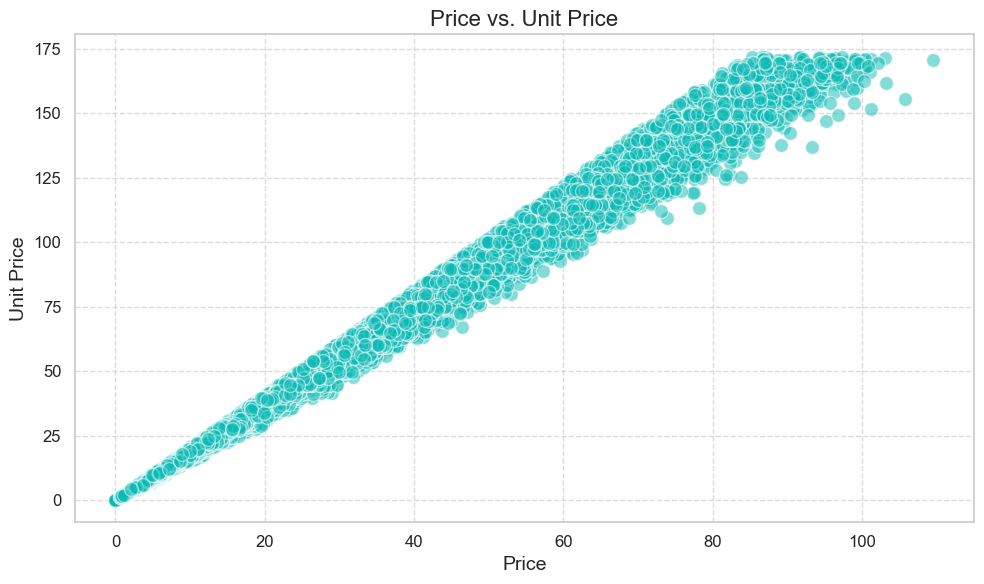

In [905]:
# Select the first quarter of the data and remove duplicates
temp=data.copy()
temp = temp.drop_duplicates(subset='itemid')

# Enhanced Scatter Plot for Price vs. Unit Price
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(temp['price'], temp['unitprice'], alpha=0.5, c='#0ABAB5', edgecolors='w', s=100)
plt.title('Price vs. Unit Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Unit Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

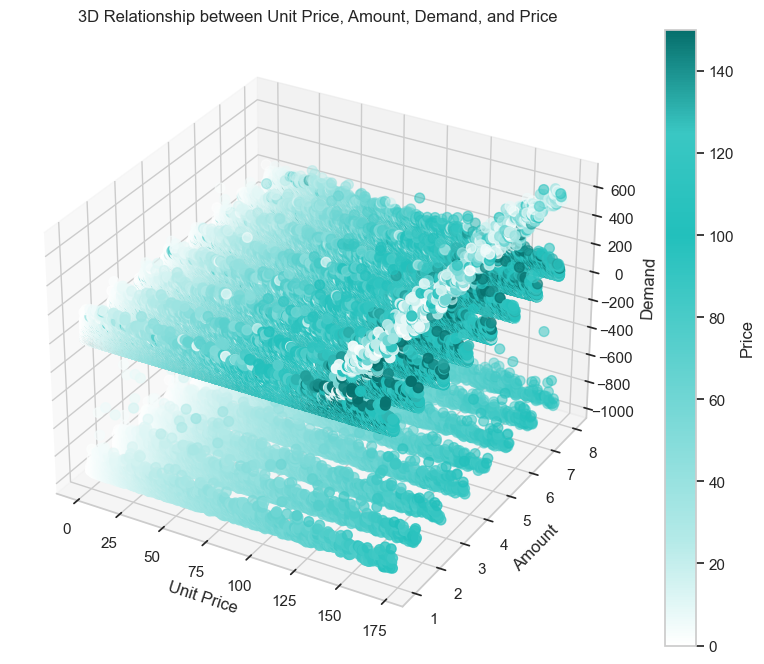

In [906]:
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', ['#FFFFFF', '#b5eae8', '#84dcda', '#53cecb', '#22c0bc', '#3ac7c3', '#066f6c'], N=256)


# Setting up the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
scatter = ax.scatter(data['unitprice'], data['amount'], data['diff'], c=data['price'], cmap=custom_cmap, s=50)

# Adding labels and title
ax.set_xlabel('Unit Price')
ax.set_ylabel('Amount')
ax.set_zlabel('Demand')
ax.set_title('3D Relationship between Unit Price, Amount, Demand, and Price')

# Adding color bar to indicate the PRICE values
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Price')

plt.show()

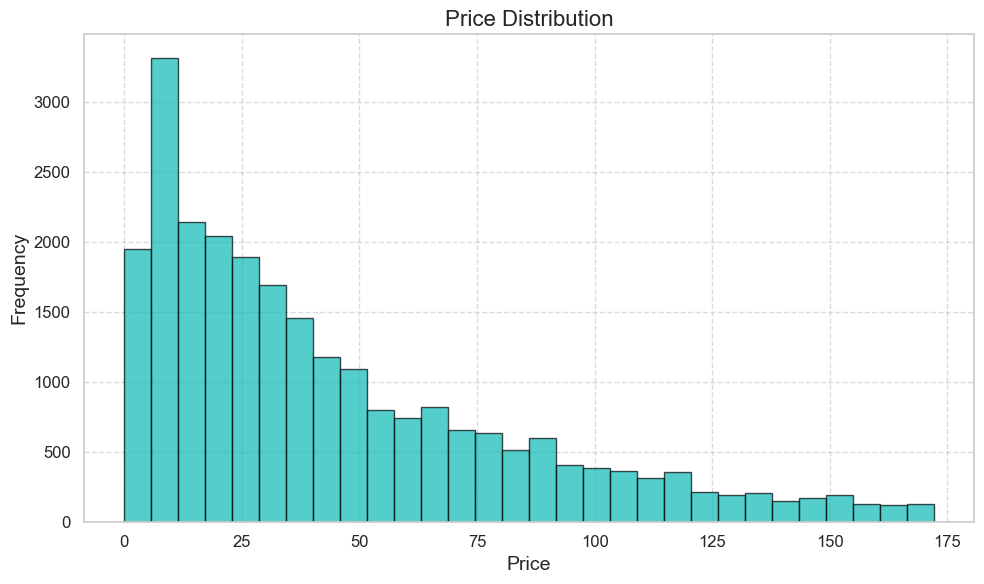

In [907]:

# Remove duplicates based on 'itemid'
temp = data.drop_duplicates(subset='itemid')

# Enhanced Histogram for Price vs. Unit Price
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Creating the histogram
plt.hist(temp['unitprice'], bins=30, color='#0ABAB5', edgecolor='black', alpha=0.7)

plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [908]:
data=data.dropna();
data=data[data['diff']>=0]
X = data[['diff','amount','unitprice']]
y = data['price']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Regression Model

In [909]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train,y_train)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

[Text(0.5, 0.875, 'X[2] <= 56.02\nsquared_error = 1094.528\nsamples = 616865\nvalue = 37.561'),
 Text(0.25, 0.625, 'X[2] <= 25.775\nsquared_error = 264.328\nsamples = 437342\nvalue = 21.106'),
 Text(0.125, 0.375, 'X[2] <= 13.675\nsquared_error = 131.63\nsamples = 266018\nvalue = 12.374'),
 Text(0.0625, 0.125, 'squared_error = 108.484\nsamples = 154529\nvalue = 7.923'),
 Text(0.1875, 0.125, 'squared_error = 98.208\nsamples = 111489\nvalue = 18.542'),
 Text(0.375, 0.375, 'X[2] <= 40.425\nsquared_error = 168.149\nsamples = 171324\nvalue = 34.664'),
 Text(0.3125, 0.125, 'squared_error = 109.012\nsamples = 99311\nvalue = 29.261'),
 Text(0.4375, 0.125, 'squared_error = 153.912\nsamples = 72013\nvalue = 42.116'),
 Text(0.75, 0.625, 'X[2] <= 93.545\nsquared_error = 850.37\nsamples = 179523\nvalue = 77.648'),
 Text(0.625, 0.375, 'X[2] <= 72.875\nsquared_error = 367.278\nsamples = 107412\nvalue = 63.574'),
 Text(0.5625, 0.125, 'squared_error = 237.844\nsamples = 56557\nvalue = 56.219'),
 Text(0.

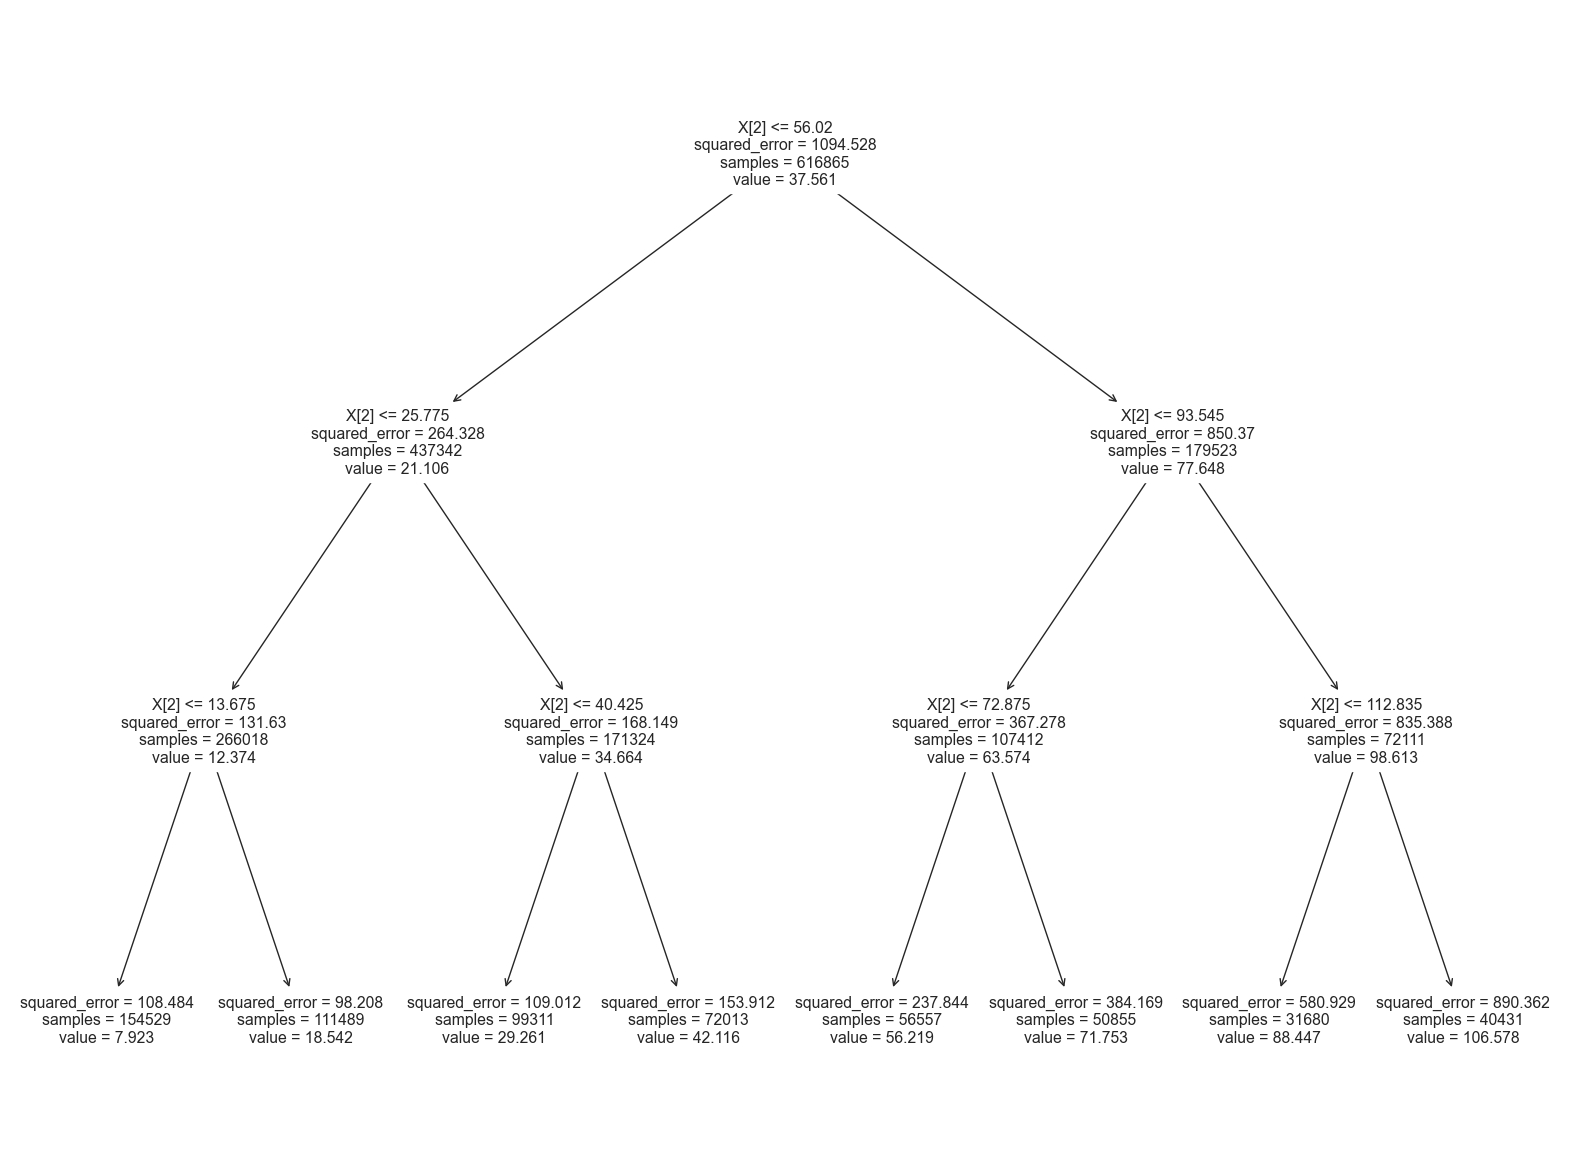

In [910]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=[20,15])
plot_tree(clf)

In [911]:

y_pred=clf.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-square
DecisionTreeRegressor_r2 = r2_score(y_test, y_pred)


print("MSE is = ",mse)
print("RMSE is = ",rmse)
print("MAE is = ",mae)
print("R-square is = ",DecisionTreeRegressor_r2)
results = {'Decision tree': [mse,rmse,mae,DecisionTreeRegressor_r2]}



MSE is =  221.10913810991096
RMSE is =  14.869739006112749
MAE is =  9.443972887746218
R-square is =  0.7979741392220726


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

### Bayesian Ridge Regression Model

In [912]:
# Create a Bayesian Ridge regression model
bayesian_ridge_model = linear_model.BayesianRidge()

# Fit the model on the training data
bayesian_ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bayesian_ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-square
BayesianRidge_r2 = r2_score(y_test, y_pred)


print("MSE is = ",mse)
print("RMSE is = ",rmse)
print("MAE is = ",mae)
print("R-square is = ",BayesianRidge_r2)


# Store the evaluation metrics in a dictionary
results['Bayesian Ridge'] = [mse, rmse, mae,BayesianRidge_r2]
results

MSE is =  218.34229892754442
RMSE is =  14.776410217896105
MAE is =  9.269741908522063
R-square is =  0.8005021806781152


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

{'Decision tree': [221.10913810991096,
  14.869739006112749,
  9.443972887746218,
  0.7979741392220726],
 'Bayesian Ridge': [218.34229892754442,
  14.776410217896105,
  9.269741908522063,
  0.8005021806781152]}

### Linear Regression

In [928]:

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-square
LinearRegression_r2 = r2_score(y_test, y_pred)


print("MSE is = ",mse)
print("RMSE is = ",rmse)
print("MAE is = ",mae)
print("R-square is = ",LinearRegression_r2)

results['Linear regression']=[mse,rmse,mae,LinearRegression_r2]
results

MSE is =  218.3422998006615
RMSE is =  14.776410247440394
MAE is =  9.269733688602258
R-square is =  0.8005021798803542


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

{'Decision tree': [221.10913810991096,
  14.869739006112749,
  9.443972887746218,
  0.7979741392220726],
 'Bayesian Ridge': [218.34229892754442,
  14.776410217896105,
  9.269741908522063,
  0.8005021806781152],
 'Linear regression': [218.3422998006615,
  14.776410247440394,
  9.269733688602258,
  0.8005021798803542],
 'Random Forest': [218.73857728191004,
  14.78981329435602,
  9.392603415584544,
  0.8001401039393031],
 'xgboost': [205.26683830093552,
  14.327136430596852,
  8.803151502445408,
  0.812449136876938],
 'CatBoost Regressor': [205.1027475948813,
  14.321408715447,
  8.798734691965825,
  0.8125990653982991]}

### Randamforest

In [929]:
# Create a Random Forest Regressor model with a maximum depth of 3
random_forest_model = RandomForestRegressor(max_depth=3, random_state=0)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-square
RandomForestRegressor_r2 = r2_score(y_test, y_pred)


print("MSE is = ",mse)
print("RMSE is = ",rmse)
print("MAE is = ",mae)
print("R-square is = ",RandomForestRegressor_r2)

# Store the evaluation metrics in a dictionary
results['Random Forest'] = [mse, rmse, mae,RandomForestRegressor_r2]

# Print the results dictionary
print(results)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

MSE is =  218.73857728191004
RMSE is =  14.78981329435602
MAE is =  9.392603415584544
R-square is =  0.8001401039393031
{'Decision tree': [221.10913810991096, 14.869739006112749, 9.443972887746218, 0.7979741392220726], 'Bayesian Ridge': [218.34229892754442, 14.776410217896105, 9.269741908522063, 0.8005021806781152], 'Linear regression': [218.3422998006615, 14.776410247440394, 9.269733688602258, 0.8005021798803542], 'Random Forest': [218.73857728191004, 14.78981329435602, 9.392603415584544, 0.8001401039393031], 'xgboost': [205.26683830093552, 14.327136430596852, 8.803151502445408, 0.812449136876938], 'CatBoost Regressor': [205.1027475948813, 14.321408715447, 8.798734691965825, 0.8125990653982991]}


### xgboost

In [915]:
# Create and train the XGBoost regressor
xg_reg = xgb.XGBRegressor(max_depth=3, random_state=0)
# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Print predictions
print(y_pred)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

# Print metrics
print("MSE is = ",mse)
print("RMSE is = ",rmse)
print("MAE is = ",mae)
print("R-square is = ",xgb_r2)

# Store results
results['xgboost'] = [mse,rmse,mae,xgb_r2]


[22.501312 19.364014  8.100823 ... 59.684124 39.090508 44.94061 ]
MSE is =  205.26683830093552
RMSE is =  14.327136430596852
MAE is =  8.803151502445408
R-square is =  0.812449136876938


### CatBoost

In [916]:
# Initialize CatBoostRegressor
regr = CatBoostRegressor(verbose=0)  # verbose=0 to disable output during training

# Fit the model
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
catboost_r2 = r2_score(y_test, y_pred)

# Print metrics
print("MSE is = ",mse)
print("RMSE is = ",rmse)
print("MAE is = ",mae)
print("R-square is = ",catboost_r2)

# Store results
results['CatBoost Regressor'] = [mse, rmse, mae,catboost_r2]


MSE is =  205.1027475948813
RMSE is =  14.321408715447
MAE is =  8.798734691965825
R-square is =  0.8125990653982991


### R square test
- 0.00 - 0.20: Weak or no relationship
- 0.20 - 0.40: Fair relationship
- 0.40 - 0.60: Moderate relationship
- 0.60 - 0.80: Strong relationship
- 0.80 - 1.00: Very strong relationship

In [917]:
print("R^2 for Linear Regression Model is",LinearRegression_r2)
print("R^2 for Bayesian Ridge Model is",BayesianRidge_r2)
print("R^2 for Random Forest Model is",RandomForestRegressor_r2)
print("R^2 for Decision Tree Model is",DecisionTreeRegressor_r2)
print("R^2 for XGB Model is",xgb_r2)
print("R^2 for CatBoost Model is",catboost_r2)


R^2 for Linear Regression Model is 0.8005021798803542
R^2 for Bayesian Ridge Model is 0.8005021806781152
R^2 for Random Forest Model is 0.8001401039393031
R^2 for Decision Tree Model is 0.7979741392220726
R^2 for XGB Model is 0.812449136876938
R^2 for CatBoost Model is 0.8125990653982991


### compare models 

{'Decision tree': [221.10913810991096,
  14.869739006112749,
  9.443972887746218,
  0.7979741392220726],
 'Bayesian Ridge': [218.34229892754442,
  14.776410217896105,
  9.269741908522063,
  0.8005021806781152],
 'Linear regression': [218.3422998006615,
  14.776410247440394,
  9.269733688602258,
  0.8005021798803542],
 'Random Forest': [218.73857728191004,
  14.78981329435602,
  9.392603415584544,
  0.8001401039393031],
 'xgboost': [205.26683830093552,
  14.327136430596852,
  8.803151502445408,
  0.812449136876938],
 'CatBoost Regressor': [205.1027475948813,
  14.321408715447,
  8.798734691965825,
  0.8125990653982991]}

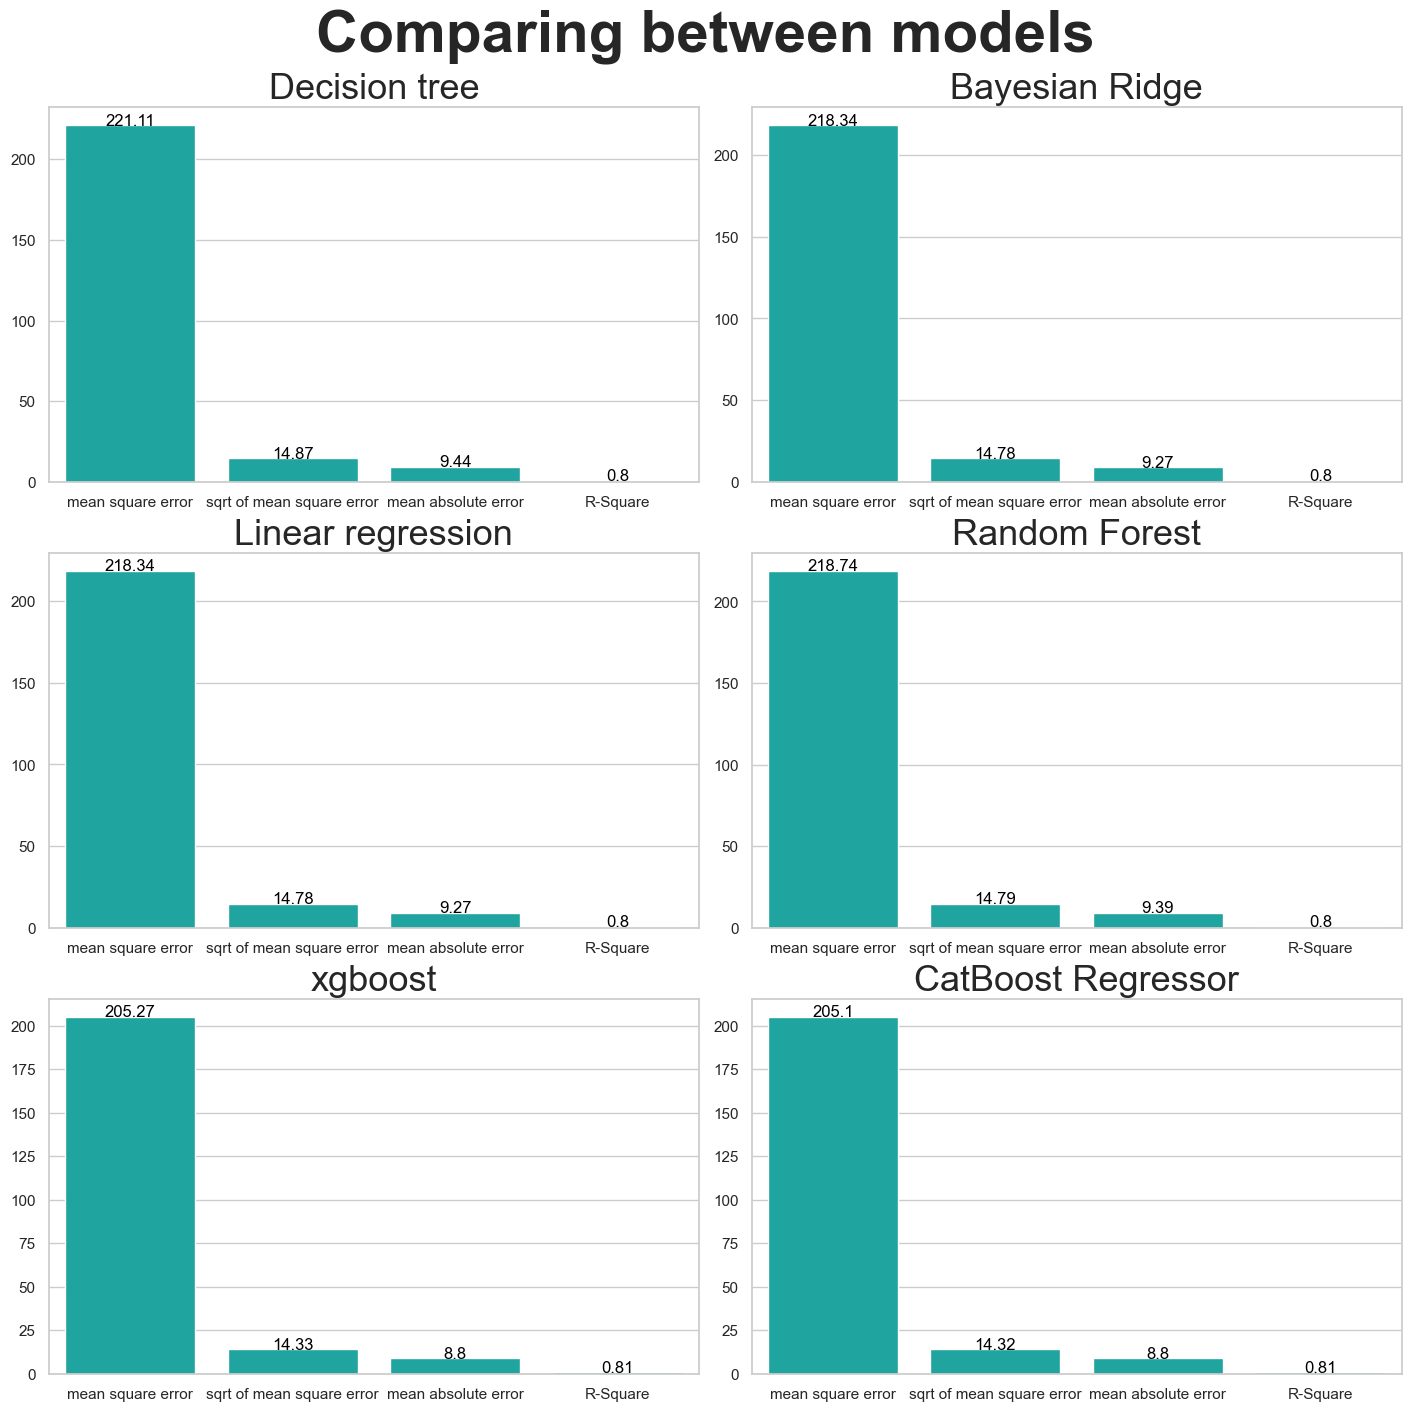

In [930]:
def plotCompare(results, x_ax):
  fig, axs = plt.subplots(nrows=3, ncols=2,
                          figsize=(14, 14), constrained_layout=True)
  fig.suptitle('Comparing between models', fontweight="bold", size=42)

  for i, var in enumerate(results.keys()):
    row = i // 2
    pos = i % 2

    # Limit maximum row and column to avoid IndexError
    if row >= len(axs):
      row = len(axs) - 1  # Use the last row
    if pos >= len(axs[row]):
      pos = len(axs[row]) - 1  # Use the last column in that row

    axs[row, pos].set_title(var, size=26)
    d = []
    value = results[var]
    for v in value:
      d.append(v)

    g = sns.barplot(x=x_ax, y=d,color='#0ABAB5', ax=axs[row][pos])
    counter = 0
    for va in value:
      v = round(va, 2)
      g.text(counter, va, v, color='black', ha="center")
      counter += 1

plotCompare(results, ['mean square error', 'sqrt of mean square error', 'mean absolute error','R-Square'])
results

R^2 for Bayesian Ridge Model is 0.8005021806781152
R^2 for Random Forest Model is 0.8001401039393031
R^2 for Decision Tree Model is 0.7979741392220726
R^2 for XGB Model is 0.812449136876938
R^2 for CatBoost Model is 0.8125990653982991


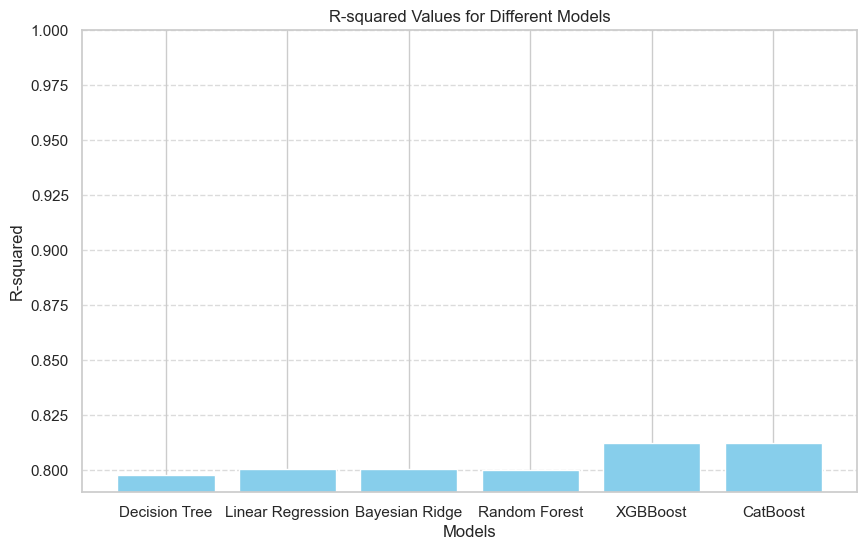

In [919]:
# print("R^2 for Linear Regression Model is",LinearRegression_r2)
print("R^2 for Bayesian Ridge Model is",BayesianRidge_r2)
print("R^2 for Random Forest Model is",RandomForestRegressor_r2)
print("R^2 for Decision Tree Model is",DecisionTreeRegressor_r2)
print("R^2 for XGB Model is",xgb_r2)
print("R^2 for CatBoost Model is",catboost_r2)

# Example R-squared values for 6 different models
models = ['Decision Tree', 'Linear Regression', 'Bayesian Ridge', 'Random Forest', 'XGBBoost', 'CatBoost']
r_squared_values = [DecisionTreeRegressor_r2, LinearRegression_r2, BayesianRidge_r2, RandomForestRegressor_r2, xgb_r2, catboost_r2]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Values for Different Models')
plt.ylim(0.79, 1)  # R-squared values range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [920]:
temp=data[['diff',	'amount','unitprice']]
after = model.predict(temp)
after

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

array([23.65292801, 23.99761249, 23.93516523, ..., 98.63929351,
       98.93462292, 99.23894746])

In [921]:
before=data['price']
before

888912     14.46
398726     15.32
538608     15.89
757932     14.71
866644     16.17
           ...  
117554    127.42
159142    135.40
354753    129.13
985572     43.01
580156      6.67
Name: price, Length: 881236, dtype: float64

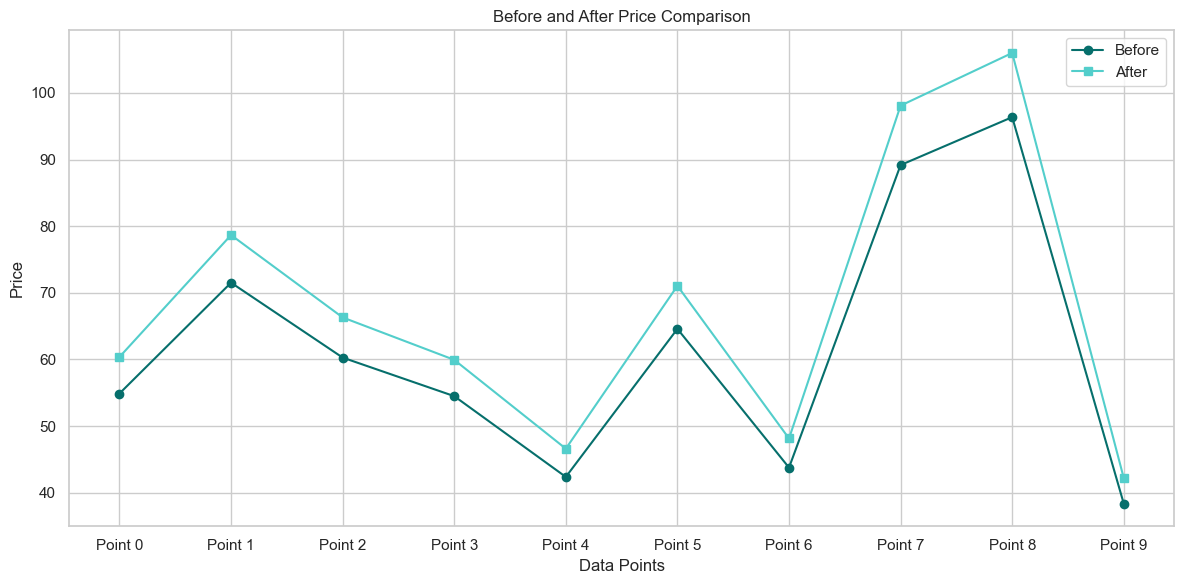

In [922]:
# after = model.predict(temp)
# before=data['price']

# Example data (replace with your actual data)
np.random.seed(0)
data_size = 10
before = np.random.rand(data_size) * 100
after = before * 1.1  # Assuming 'after' values are 10% higher than 'before' values for illustration

# Generate x-axis indices
indices = np.arange(data_size)

plt.figure(figsize=(12, 6))

# Plot before values
plt.plot(indices, before, 'o-', label='Before', color='#066f6c')

# Plot after values
plt.plot(indices, after, 's-', label='After', color='#53cecb')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Before and After Price Comparison')
plt.xticks(indices, ['Point {}'.format(i) for i in range(data_size)])  # Custom x-axis labels
plt.legend()

plt.tight_layout()
plt.show()


In [923]:
after.sum()-before.sum()

61.576628331454344

In [924]:
regr.score(X_test,y_test)*100

81.25990653982991

### sample Link Between MBA and DP results

In [925]:
# For orderID = 7438 from category EV and orderID = 18171 from category KARO
# Both categories are usually sold together
temp1=data[data['itemid']==7438]
temp2=data[data['itemid']==18171]
temp1.head()

,date_,amount,itemid,unitprice,price,diff
946877,2021-01-25,4,7438,32.9,18.04,3.0
518584,2021-03-19,4,7438,32.9,20.52,53.0
0,2021-04-19,5,7438,32.9,20.42,31.0
735672,2021-04-27,2,7438,32.9,20.77,8.0
672295,2021-05-02,3,7438,32.9,20.71,5.0


In [926]:
# For first item the price in one transaction equal to 20.42 if he bye items equal to 4 and diff 31 and oreginal price is 32.9 for 1 item
# lets bredect for another one in same state condations 
for_test= [[31, 5 , 50]]
for_test = pd.DataFrame(for_test, columns=["diff", "amount", "unitprice"])
answer = model.predict(for_test)
# recomend to him to buy both in one package with a discount of a certain value
answer[0]

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

43.21814202256614

In [927]:
discount=((50-answer[0])/50)*100
discount

13.563715954867718

dynamicly recoment it to seller and customer, buy one get one with discout 13%